# PCA and image compression

This notebook uses PCAs to compress and image.

We first solve the problem using the sklean PCA package, and the we repeat the same process but doing it manually.

To run I need to have the `compiling-ai` conda environment running.

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import scipy.io as sio
import matplotlib.image as image
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
img = Image.open("./pics/pca-img.jpg")
img = img.convert('L')

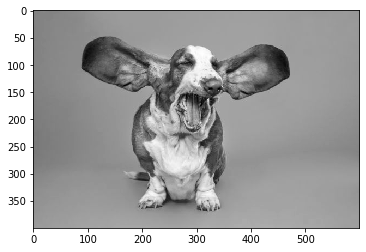

In [3]:
plt.imshow(img, cmap='gray')

In [4]:
x = normalize(img)

In [5]:
x.shape

(400, 600)

In [113]:
# Set pca to find principal components that explain 99% of the variation in the data
variation = 0.99999999999999
pca = PCA(variation)

# Run PCA on normalized image data
img_model = pca.fit_transform(x)

# Lower dimension data should be smaller than the original
img_model.shape

(400, 397)

In [114]:
# Project lower dimension data onto original features
approx_img = pca.inverse_transform(img_model)

# Approximation 
approx_img.shape

(400, 600)

(-0.5, 599.5, 399.5, -0.5)

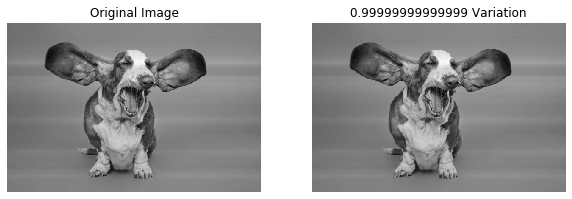

In [115]:
fig4, axarr = plt.subplots(1,2,figsize=(10,10))
axarr[0].imshow(x,cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')
                  
axarr[1].imshow(approx_img,cmap='gray')
axarr[1].set_title(f'{variation} Variation')
axarr[1].axis('off')                  

## Doing it manually

In [226]:
def pca(img, num_pca=1):
    "Calculates PCAs"
    img_mean = np.mean(np.transpose(img), axis=1)
    IMG = (img - img_mean).T  # subtract the mean (along columns)
    
    # eigendecomposition of the covariance matrix
    eigvalues, eigvectors = np.linalg.eig(np.cov(IMG))
    
    n_eigs = np.size(eigvectors, axis=1)
    # sort the eigenvalues
    idx = np.argsort(eigvalues) 
    idx = idx[::-1]       # in ascending order
    
    # sorting eigenvectors according to the sorted eigenvalues
    eigvectors = eigvectors[:,idx]
    
    # Cut some principal components if desired
    if num_pca < n_eigs and num_pca >= 0:
        eigvectors = eigvectors[:,range(num_pca)] 
        
    # Project the data in the new space
    proj_IMG = np.dot(eigvectors.T, IMG) 
    return eigvalues, eigvectors, proj_IMG


def pca_pc(img, percentage_exp=1):
    "Calculates PCAs based on the percentage of variation wanted"
    
    img_mean = np.mean(np.transpose(img), axis=1)
    IMG = (img - img_mean).T  # subtract the mean (along columns)
    
    # eigendecomposition of the covariance matrix
    eigvalues, eigvectors = np.linalg.eig(np.cov(IMG))
    
    n_eigs = np.size(eigvectors, axis=1)
    # sort the eigenvalues
    idx = np.argsort(eigvalues) 
    idx = idx[::-1]       # in ascending order
    
    # sorting eigenvectors according to the sorted eigenvalues
    eigvalues = np.real(eigvalues[idx])
    eigvectors = eigvectors[:,idx]
    
    
    cum_sum = np.cumsum(eigvalues)/np.sum(eigvalues)
    sel_idx = cum_sum>=percentage_exp
        
    eigvalues  = eigvalues[~ sel_idx]
    eigvectors = eigvectors[:,~ sel_idx]
        
    print(f'Explaning var %: {cum_sum[~sel_idx][-1]}, using {len(eigvalues)} PCAs')
    
    # Project the data in the new space
    proj_IMG = np.dot(eigvectors.T, IMG) 
    return eigvalues, eigvectors, proj_IMG

In [227]:
pca_pc(x, 0.7);

Explaning var %: 0.6823289055092772, using 5 PCAs


In [234]:
percentage_exp=1
eigvalues, eigvectors, proj_IMG = pca_pc(x, percentage_exp=percentage_exp)

img_mean = np.mean(np.transpose(img), axis=1)

# inverse PCA to reconstruct the image
approx_img = np.dot(eigvectors, proj_IMG).T + img_mean.T 

Explaning var %: 0.9999999999999996, using 600 PCAs


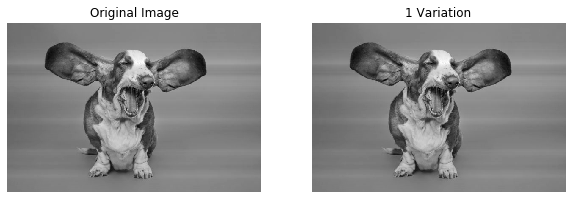

In [235]:
fig4, axarr = plt.subplots(1,2,figsize=(10,10))
axarr[0].imshow(x,cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')
                  
axarr[1].imshow(np.real(approx_img),cmap='gray')
axarr[1].set_title(f'{percentage_exp} Variation')
axarr[1].axis('off');  

Below is to double check that we get the same results if we directly use num_pca

In [170]:
eigvalues, eigvectors, proj_IMG = pca(x, num_pca=5)

img_mean = np.mean(np.transpose(img), axis=1)

# inverse PCA to reconstruct the image
approx_img = np.dot(eigvectors, proj_IMG).T + img_mean.T 

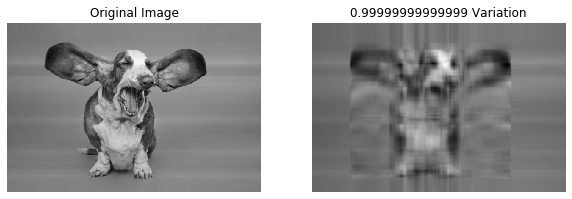

In [172]:
fig4, axarr = plt.subplots(1,2,figsize=(10,10))
axarr[0].imshow(x,cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')
                  
axarr[1].imshow(np.real(approx_img),cmap='gray')
axarr[1].set_title(f'{variation} Variation')
axarr[1].axis('off');                

# References

1. [PCA](https://dilloncamp.com/projects/pca.html)

2. [calculate-principal-component-analysis-scratch-python](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)

3. Section 7.3 Principal Component Analysis (PCA by the SVD), Introduction to Linear Algebra, Fifth Edition, 2016.

4. Section 2.12 Example: Principal Components Analysis, Deep Learning, 2016.

5. [principal-component-analysis-with-numpy](https://glowingpython.blogspot.com/2011/07/principal-component-analysis-with-numpy.html)

6. [Pca-and-image-compression-with-numpy](https://glowingpython.blogspot.com/2011/07/pca-and-image-compression-with-numpy.html)

7. [Kaggle, Image compression with PCA form scratch](https://www.kaggle.com/marnixk/image-compression-with-pca-from-scratch-math)

8. [Ali Ghodsi, Lec 1: Principal Component Analysis](https://www.youtube.com/watch?v=L-pQtGm3VS8)